## 自相关

自相关是一个信号自身的相关性。这说明信号在时间或空间上是如何联系的。这可以用来查看信号的周期性。为了证明这点，我们首先使用sine生成一个周期为$4\pi$和大小为2的信号。图5.17显示了信号在上面的容器内，自相关在下面的容器内。使用`plt.grid`函数绘制自相关。我们已经使用`plt.grid`函数显示了在图中。使用`plt.axhline`绘制了网格水平线0和$e^{-1}$。自相关显示一个具有周期为$4\pi$的很好的周期性行为。

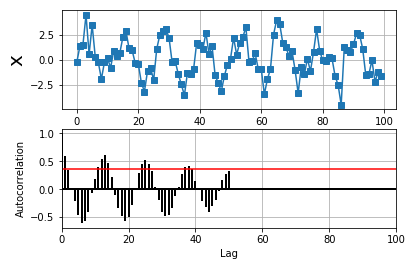

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.sin(np.arange(100)/2.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

<center>图5.17:显示使用正弦函数生成的100个随机数的图，以及该系列的自相关。</center>

自相关函数也用于计算相关长度。相关长度是指从这一个点到另一个点的距离，与该点相关的物理属性没有进一步的相关性。在数学上，相关长度是自相关等于$e^{-1}$的滞后时间，这由图中的水平红线表示。让我们绘制一个具有较高周期性的图来计算相关长度。结果如图5.18所示。从图形上看，相关性大约为9。

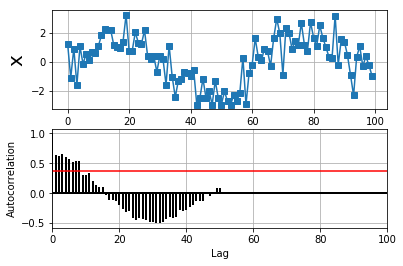

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.sin(np.arange(100)/10.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

<center>图5.18:显示使用正弦函数生成的100个随机数的图，以及该系列的自相关。</center>

为了精确地确定相关长度，我们将拟合滞后和相关长度之间的插值函数，然后确定在自相关成为$e^{-1}$时的滞后。`plt.acorr`在这些滞后处返回滞后和自相关。首先我们将各自为滞后和自相关性赋单独的变量。我们也可以打印滞后，看看里面是什么。

In [12]:
lags = c[0] # lags
auto_corr = c[1] # autocorrelation
print(lags)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


`acorr`提供正、负滞后。我们并不都需要，我们可以通过给一个索引清楚它，这个索引是boolean格式，并通过使用`lags>=0`声明获取。我们也移除对应于负滞后的自相关数组。

In [13]:
auto_corr = auto_corr[lags>=0]
lags = lags[lags>=0]

现在，我们需要两个点的自相关，一个只在阈值以上，另一个只在阈值以下。我们通过计算自相关超过阈值的次数来得到它们的索引。

In [14]:
n = sum(auto_corr>np.exp(-1))
print(n)

9


一个点在第八个索引处，和另一个点在第九个索引处。现在，我们使用`interp1d`得到在自相关等于阈值时正确的滞后值。这里提供的相关长度为8.74。

In [18]:
from scipy.interpolate import interp1d
f = interp1d([auto_corr[n], auto_corr[n-1]], [lags[n], lags[n-1]])
corr_len = f(np.exp(-1))
corr_len

array(8.742091971219681)